# Libraries

In [1]:
import numpy as np
from scipy import fft, signal
import math
import matplotlib.pyplot as plt

# %matplotlib ipympl
%matplotlib inline

* Improve spectral resolution by increasing the number of samples
* Windowing has a tradeoff - rectangular window gets you the sharpest main lobe - better for resolving the signal. Soft windows get you large main lobes but much lower side lobes - better for resolving out-of-band frequencies.

Text(0.5, 0, 'FFT Bin Index')

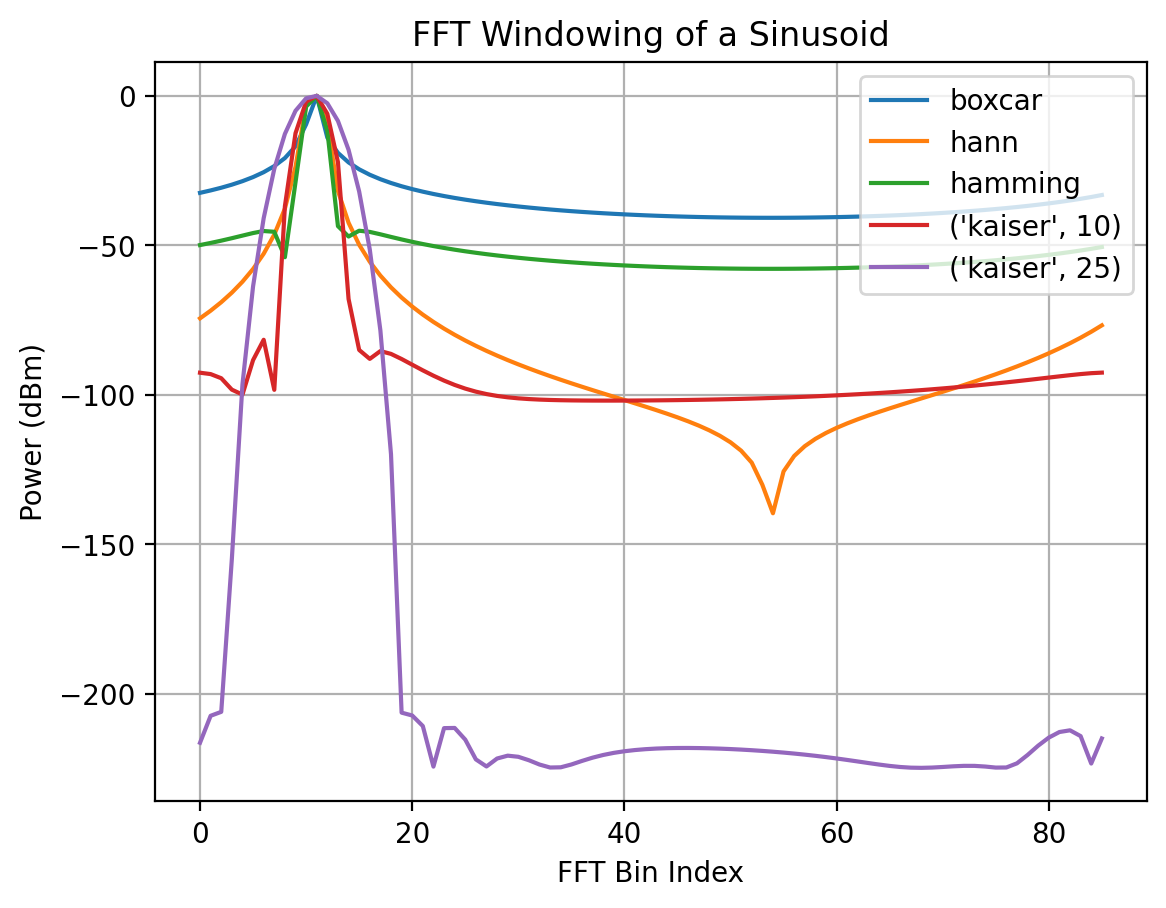

In [12]:
N = 8
w0 = 2*np.pi/N
# nsamp = N*100+3
nsamp = math.floor(N*10.78)
# nsamp = math.floor(N*1.78)
x = np.exp(1j*w0*np.arange(nsamp, dtype="float"))
# win = signal.windows.get_window("hann", x.size)
# win = signal.windows.get_window("hamming", x.size)
# win = signal.windows.get_window(("kaiser", 25), x.size)

windows = ["boxcar", "hann", "hamming", ("kaiser", 10), ("kaiser", 25)]
fig, ax = plt.subplots(dpi=200)
for window in windows:
    win = signal.windows.get_window(window, x.size)
    x_win = x*win
    # x_win = np.concatenate((x_win, np.zeros(2048-x_win.size)))

    x_fft = fft.fft(x_win)
    x_fft = x_fft/np.abs(x_fft).max()
    ax.plot(np.arange(x_fft.size), 20*np.log10(np.abs(x_fft)), label=str(window))

ax.grid()
ax.legend(loc="upper right")
ax.set_title("FFT Windowing of a Sinusoid")
ax.set_ylabel("Power (dBm)")
ax.set_xlabel("FFT Bin Index")
# ax.set_ylim(bottom=-100, top=0)
# ax.set_xlim(left=0, right=1000)

In [ ]:
N = 8
w0 = 2*np.pi/N
# nsamp = N*100+3
nsamp = math.floor(N*10.78)
# nsamp = math.floor(N*1.78)
x = np.exp(1j*w0*np.arange(nsamp, dtype="float"))
# win = signal.windows.get_window("hann", x.size)
# win = signal.windows.get_window("hamming", x.size)
# win = signal.windows.get_window(("kaiser", 25), x.size)
x_win = x*win

x = np.concatenate((x, np.zeros(2048-x.size)))
x_win = np.concatenate((x_win, np.zeros(2048-x_win.size)))

x_fft = fft.fft(x)
x_win_fft = fft.fft(x_win)

x_fft = x_fft/np.abs(x_fft).max()
x_win_fft = x_win_fft/np.abs(x_win_fft).max()

fig, ax = plt.subplots(dpi=100)
# ax.stem(np.arange(x_fft.size), np.abs(x_fft), label="Rectangular Window")
# ax.stem(np.arange(x_win_fft.size), np.abs(x_win_fft), linefmt="C1:", label="Hanning Window")
ax.plot(np.arange(x_fft.size), 20*np.log10(np.abs(x_fft)), label="Rectangular Window")
ax.plot(np.arange(x_win_fft.size), 20*np.log10(np.abs(x_win_fft)), label="Hanning Window")
ax.grid()
ax.legend(loc="upper right")
# ax.set_ylim(bottom=-60, top=0)
# ax.set_xlim(left=80, right=120)

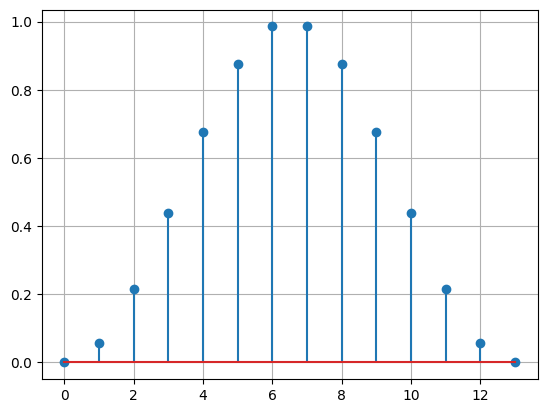

In [24]:
fig, ax = plt.subplots(dpi=100)
ax.stem(signal.windows.get_window("hann",14, fftbins=False))
ax.grid()